#Predict number of bikers on a given day using linear regression
the dataset is about Seattle's Fremont Bridge in the form of a csv file.
The data contains different details about a given day, like weather, temperature and other factors (see the dataframe preview below) for more details. The data also contains how many bikers were observed crossing the bridge that day.


the project is to **train a linear regression model** which takes in the parameters of the day and predicts the number of bikers according to those parameters.

I will divide the data into a train (80%) and a validation data set (20%).

Then, I will print the **train and validation losses**



In [1]:
from IPython.display import clear_output

In [2]:
# Incase you run this notebook outside colab (where the libraries aren't already pre-installed)

%pip install gdown
%pip install pandas
%pip install numpy

clear_output()

In [3]:
# Download the CSV file.
!gdown 1_eJU8Y-31_l0oq1sSJT6pROJyo-ufuvD

Downloading...
From: https://drive.google.com/uc?id=1_eJU8Y-31_l0oq1sSJT6pROJyo-ufuvD
To: /content/bikers_data.csv
100% 213k/213k [00:00<00:00, 54.4MB/s]


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [5]:
data_df = pd.read_csv('bikers_data.csv')

In [6]:
data_df.head()

,Date,Number of bikers,Mon,Tue,Wed,Thu,Fri,Sat,Sun,holiday,daylight_hrs,Rainfall (in),Temp (F),dry day
0,2012-10-03,14084.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,11.277359,0.0,56.0,1
1,2012-10-04,13900.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,11.219142,0.0,56.5,1
2,2012-10-05,12592.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,11.161038,0.0,59.5,1
3,2012-10-06,8024.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,11.103056,0.0,60.5,1
4,2012-10-07,8568.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,11.045208,0.0,60.5,1


In [7]:
data_df=data_df.drop("Date",axis =1)
data_df=data_df.drop("daylight_hrs",axis =1)
data_df=data_df.drop("Rainfall (in)",axis =1)


In [8]:
data_df.head()

,Number of bikers,Mon,Tue,Wed,Thu,Fri,Sat,Sun,holiday,Temp (F),dry day
0,14084.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,56.0,1
1,13900.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,56.5,1
2,12592.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,59.5,1
3,8024.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,60.5,1
4,8568.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,60.5,1


In [9]:
data_y = data_df['Number of bikers'] # target
data_x = data_df.drop(['Number of bikers'], axis=1) # input features

In [10]:
data_x.head()

,Mon,Tue,Wed,Thu,Fri,Sat,Sun,holiday,Temp (F),dry day
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,56.0,1
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,56.5,1
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,59.5,1
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,60.5,1
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,60.5,1


In [11]:
data_y

0       14084.0
1       13900.0
2       12592.0
3        8024.0
4        8568.0
         ...   
2641     4552.0
2642     3352.0
2643     3692.0
2644     7212.0
2645     4568.0
Name: Number of bikers, Length: 2646, dtype: float64

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [13]:
X_train, X_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.2, random_state=100)


In [14]:
theta = np.linalg.inv(X_train.T @ X_train) @ (X_train.T @ y_train)
print(theta)

[-2341.00042037 -1869.35125589 -2175.76054664 -2623.58068184
 -3935.12695921 -9552.19127542 -9929.9757192  -5448.95996319
   258.44030979  3090.29345861]


In [15]:
y_train_pred = X_train @ theta
print(y_train_pred)

1591     7307.026517
2395    14164.049195
114      7436.246671
232     10039.994498
2554    14401.398002
            ...     
350     17196.272429
1930     5778.155880
79       5885.604813
1859     -496.904412
1544     2851.829356
Length: 2116, dtype: float64


In [23]:
y_test_pred = X_test @ theta
print(y_test_pred)

647     13179.565727
688     16083.006790
1905     6421.830161
1079    12882.837905
503      9631.242530
            ...     
1308    17761.122029
983      9561.401390
547     10169.214653
1370    11452.852437
498     10427.654962
Length: 530, dtype: float64


In [17]:
mse_train = mean_squared_error(y_train, y_train_pred)
print(mse_train)

5942700.935401043


In [24]:
mse_val = mean_squared_error(y_test, y_test_pred)
print(mse_val)

5686387.630371418


Text(0, 0.5, 'predicted value')

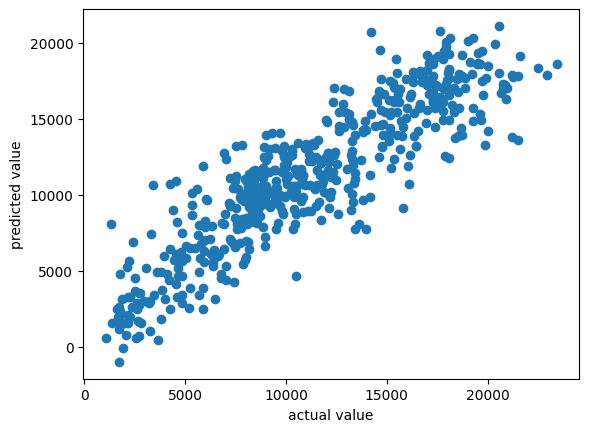

In [21]:
plt.scatter(y_test,y_test_pred)
plt.xlabel('actual value')
plt.ylabel('predicted value')

In [22]:
# Creating a new DataFrame with actual and predicted values
comparison_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_test_pred
})

# Display the new DataFrame
print(comparison_df)

       Actual     Predicted
647    9920.0  13179.565727
688   15340.0  16083.006790
1905   6944.0   6421.830161
1079   9812.0  12882.837905
503    6100.0   9631.242530
...       ...           ...
1308  21252.0  17761.122029
983   10752.0   9561.401390
547   10492.0  10169.214653
1370   8832.0  11452.852437
498    9556.0  10427.654962

[530 rows x 2 columns]
